In [1]:
# 1. Cargar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


In [2]:
# 2. Cargar un dataset (usaremos el dataset "Heart Disease" desde sklearn para fines médicos)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Ver una muestra
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Shape of data: (569, 31)

Tipos de datos:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concav

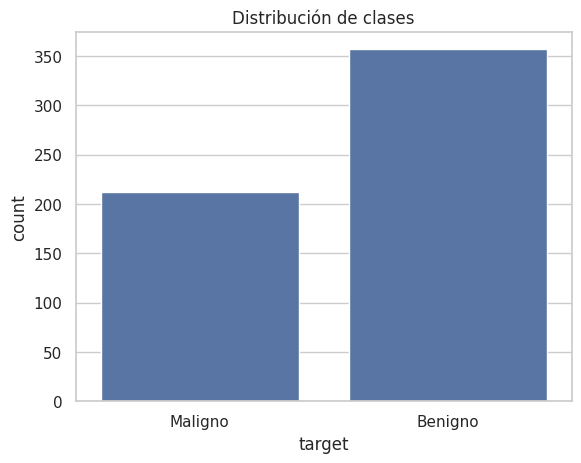

In [3]:
# 3. Análisis exploratorio de datos (EDA)
print("Shape of data:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos:\n", df.isnull().sum())

# Estadísticas básicas
df.describe()

# Distribución de clases
sns.countplot(x='target', data=df)
plt.title('Distribución de clases')
plt.xticks([0, 1], ['Maligno', 'Benigno'])
plt.show()


In [4]:
# 4. Preprocesamiento
X = df.drop('target', axis=1)
y = df['target']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [14]:
# 5. Entrenamiento con AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Predicción
y_pred = adaboost.predict(X_test)



Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Matriz de Confusión:
 [[ 58   6]
 [  2 105]]


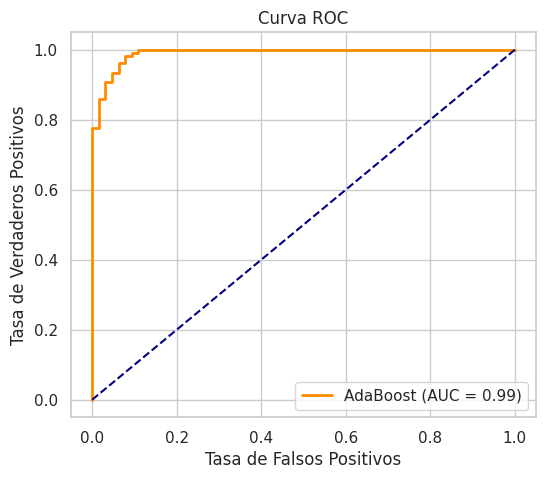

In [15]:
# 6. Evaluación del modelo
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Curva ROC
y_score = adaboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


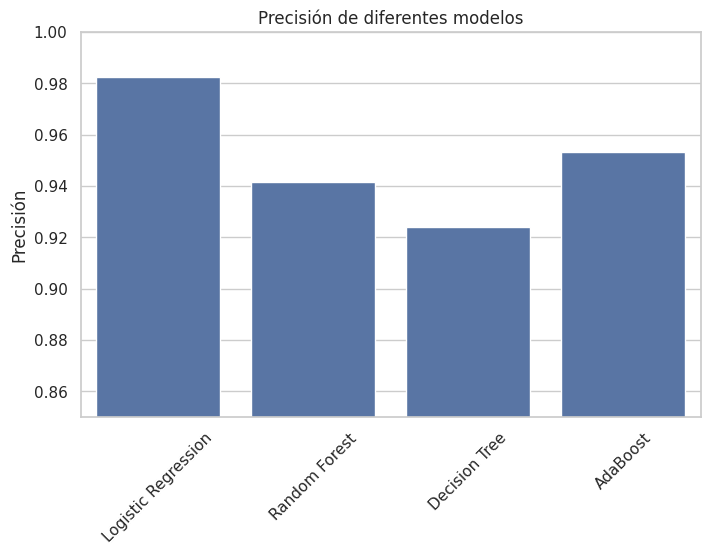

In [16]:
# 7. Comparación con otros modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': adaboost
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score

# Visualización
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Precisión de diferentes modelos')
plt.ylabel('Precisión')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()


In [17]:
# 8. Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2]  # ✅
}


grid = GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy')

grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
best_model = grid.best_estimator_


Mejores hiperparámetros: {'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 50}


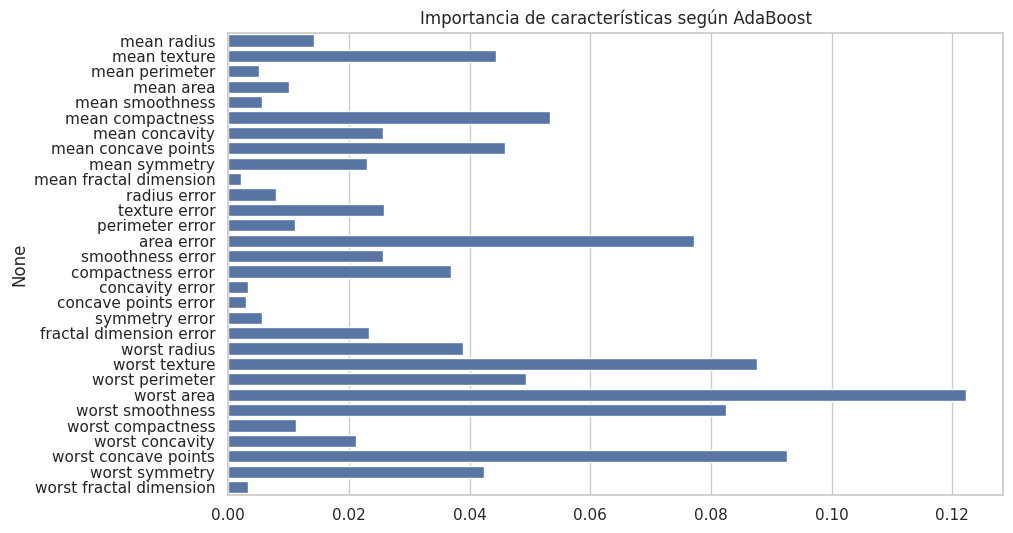

In [18]:
# 9. Importancia de variables
importances = best_model.feature_importances_
features = df.columns[:-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Importancia de características según AdaBoost")
plt.show()
